## Adiabatic and Nonisothermal Operation of a PFR

Steady-state Plug Flow Reactor with energy balance and first order reaction:
$$ A \rightarrow B$$
The problem is example 9.4.3 from the section 9.4 Nonisothermal Plug Flow Reactor from the following book:

*Davis M.E., Davis R.J. (2003) Fundamentals of Chemical Reaction Engineering. McGraw Hill, New York, US. ISBN 007245007X.*

### Problem description

A PFR of dimensions $L = 2 m$ and $d_t = 0.2 m$ is accomplishing a homogeneous reaction. The inlet concentration of the limiting reactant is $C_o=0.3 kmol/m^3$ and the inlet temperature is $700K$. Calculate the dimensionless concentration ($y = C/Co$) and temperature ($\\theta=T/To$) for adiabatic ($U = 0$) and nonisothennal ($U=70 J/(m^2.s.K$))operations.

(Example adapted from J. Villadsen and M. L. Michelsen, Solution of Differential Equation Models by Polynomial Approximation, Prentice-Hall, Englewood Cliffs, 1978, p. 59.)

### Dimensionless equations
\begin{align}
\frac{dy}{dx} &=-(Da) y exp\left[\gamma (1-\frac{1}{\theta})\right] \\
\frac{d\theta}{dx} &=-\beta_T (Da) y exp\left[\gamma (1-\frac{1}{\theta})\right] - H_w (\theta-1)
\end{align}
With the following IC
$$
@x=0, \quad
y=1, \quad
\theta=1
$$


**Rev 2**
* Updated on 2022.03.02
* New solve_ivp used instead of odeint

**Author** <br>
Mohammad Rahmani<br>
Checmical Engineering Department<br>
Amirkabir University of Technology


In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
exp = np.exp

##### 1. Problem data

In [2]:
L=3          #m, reactor length
dt=0.2       #m, tube diameter
u= 3         # m/s, superficial velocity
tau=L/u      #s,    space time
Ca0= 300     # mol/m3, inlet concen
A= 5         # 1/s, pre-exponential factor
Ea= 100      # J/mol, activation energy # Has been modified
T0= 700      # K, inlet temp
rho= 1200    # kg/m3, fluid density
cp= 1000     # J/(kg.K), fluid heat capacity
dHra= -1000  # kJ/mol # Has been modified
Tj= 700      # K
U= 70000     # W/m2.K # Has been modified

#General gas constant
Rg=8.314 #J/(mol.K)

##### 2. Dimensionless parameters

In [3]:
k=     A*exp(-Ea/(Rg*T0))
Da=    (L*k)/u
beta=  Ca0*(-dHra)/(rho*tau*T0)
gamma= Ea/(Rg*T0)
Hw=    4*U/dt * (L/(rho*cp*u))

##### 3. ODE function
This function calculate the rhs of IVP equations

In [4]:
def pfr(x, u, Hw):
    y=u[0]      # dimensionless concentration
    theta=u[1]  # dimensionless temperature
    
    du_dx=[
        -Da*y*exp(gamma*(1-1/theta)),
        beta*Da*y*exp(gamma*(1-1/theta))-Hw*(theta-1)
    ]
    return du_dx

In [5]:
# Integration range, reactor length
xspan= [0, 1]

# Initial condition: IC
u0= [1, 1] #y, theta

##### 4. Integrate the ODEs
Solve for two cases
- Adaiabatic operation
- Nonisothermal operation

In [6]:
# Solve for non-isothermal mode
sol_noniso = solve_ivp(pfr, xspan, u0, args=(Hw,), dense_output=True)

# Solve for non-isothermal mode
Hwa= 0.0 # U is zero for adiabatic operation
sol_adia = solve_ivp(pfr, xspan, u0, args=(Hwa,), dense_output=True)


##### 5. Visualization

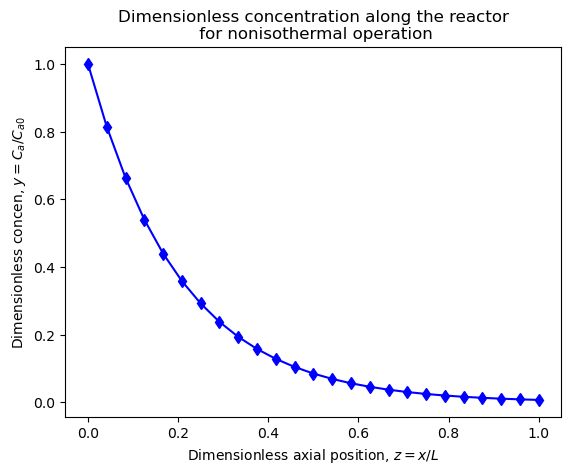

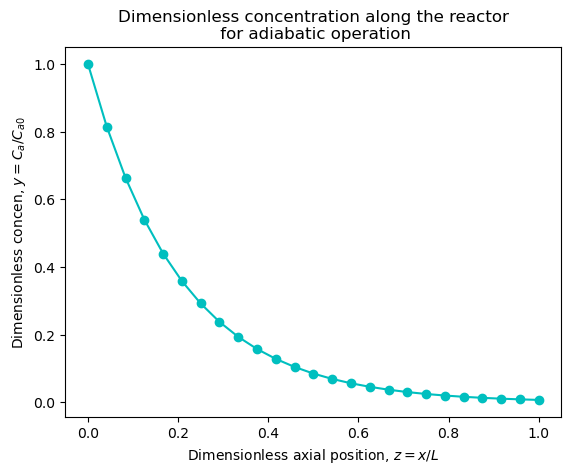

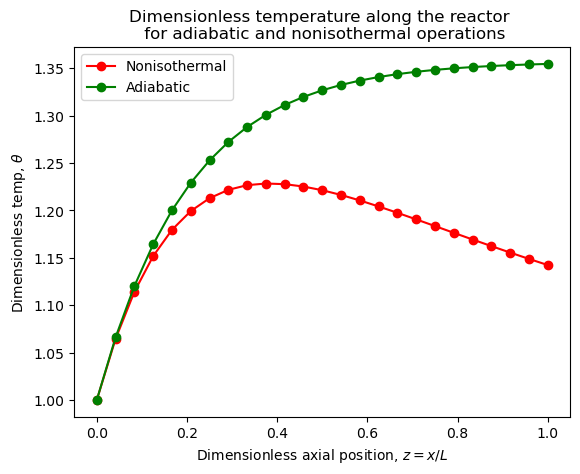

In [7]:
x = np.linspace(0, 1, 25)
u_noniso = sol_noniso.sol(x)
y_noniso =     u_noniso[0,:]
theta_noniso = u_noniso[1,:]

u_adia = sol_adia.sol(x)
y_adia =     u_adia[0,:]
theta_adia = u_adia[1,:]


plt.plot(x, y_noniso,'bd-')
plt.title('Dimensionless concentration along the reactor\n for nonisothermal operation')
plt.xlabel('Dimensionless axial position, $z=x/L$')
plt.ylabel('Dimensionless concen, $y=C_a/C_{a0}$')
plt.show()


plt.plot(x, y_adia,'co-')
plt.title('Dimensionless concentration along the reactor\n for adiabatic operation')
plt.xlabel('Dimensionless axial position, $z=x/L$')
plt.ylabel('Dimensionless concen, $y=C_a/C_{a0}$')
plt.show()


plt.plot(x, theta_noniso, 'ro-', label='Nonisothermal')
plt.plot(x, theta_adia, 'go-', label='Adiabatic')
plt.legend(loc='best')
plt.title('Dimensionless temperature along the reactor \n for adiabatic and nonisothermal operations')
plt.xlabel('Dimensionless axial position, $z=x/L$')
plt.ylabel('Dimensionless temp, $\\theta$')
plt.show()